<a href="https://colab.research.google.com/github/rafusr/rockpaperscissors/blob/main/rockpaperscissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Nama : Andika Sultanrafli
*   Email : andpuji27@gmail.com
*   List item





In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O rockpaperscissors.zip

--2021-04-24 18:03:20--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.16MB/s    in 3m 19s  

2021-04-24 18:06:39 (1.55 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

base_dir = 'rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

os.listdir(base_dir)

['rock', 'scissors', 'README_rpc-cv-images.txt', 'paper']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='wrap',
    validation_split=0.4)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='wrap',
    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2)

print(history.history.keys())

Epoch 1/20
25/25 - 38s - loss: 1.1852 - accuracy: 0.3725 - val_loss: 0.9830 - val_accuracy: 0.4437
Epoch 2/20
25/25 - 37s - loss: 0.8883 - accuracy: 0.6162 - val_loss: 0.7990 - val_accuracy: 0.6562
Epoch 3/20
25/25 - 36s - loss: 0.5851 - accuracy: 0.7818 - val_loss: 0.4279 - val_accuracy: 0.8438
Epoch 4/20
25/25 - 37s - loss: 0.3550 - accuracy: 0.8875 - val_loss: 0.4221 - val_accuracy: 0.8500
Epoch 5/20
25/25 - 36s - loss: 0.3219 - accuracy: 0.8948 - val_loss: 0.2595 - val_accuracy: 0.9062
Epoch 6/20
25/25 - 36s - loss: 0.2106 - accuracy: 0.9312 - val_loss: 0.2276 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 37s - loss: 0.2341 - accuracy: 0.9150 - val_loss: 0.3286 - val_accuracy: 0.8875
Epoch 8/20
25/25 - 36s - loss: 0.1901 - accuracy: 0.9351 - val_loss: 0.1765 - val_accuracy: 0.9563
Epoch 9/20
25/25 - 36s - loss: 0.1248 - accuracy: 0.9714 - val_loss: 0.2397 - val_accuracy: 0.9375
Epoch 10/20
25/25 - 37s - loss: 0.1220 - accuracy: 0.9638 - val_loss: 0.1132 - val_accuracy: 0.9500
Epoch 11/

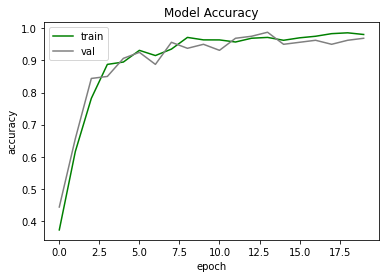

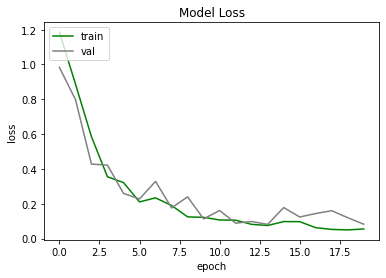

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(acc, color='green')
plt.plot(val_acc, color='grey')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='green')
plt.plot(val_loss, color='grey')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving JSDICtLrQIEXhPy5.png to JSDICtLrQIEXhPy5.png
JSDICtLrQIEXhPy5.png
SCISSORS


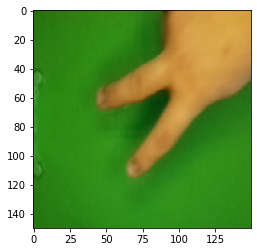

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  print(fn)
  if classes[0,0]!=0:
    print('PAPER')
  elif classes[0,1]!=0:
    print('ROCK')
  elif classes[0,2]!=0:
    print('SCISSORS')
  else:
    print('unknown')